In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\GOPI\Downloads\autos.csv",sep=",",encoding="latin-1")

In [7]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
#1) Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization
data['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

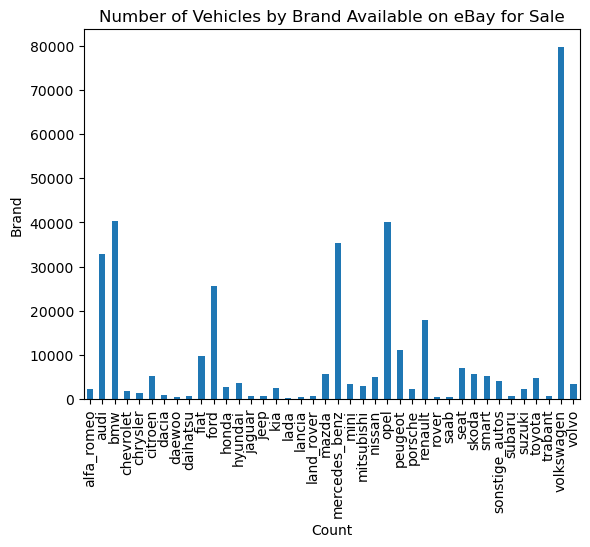

In [16]:
df=data.groupby(["brand"])["brand"].count()
df.plot(kind='bar')
plt.ylabel('Brand')
plt.xlabel('Count')
plt.title('Number of Vehicles by Brand Available on eBay for Sale')
#plt.xticks(rotation=45)
plt.show()

In [17]:
data["brand"].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

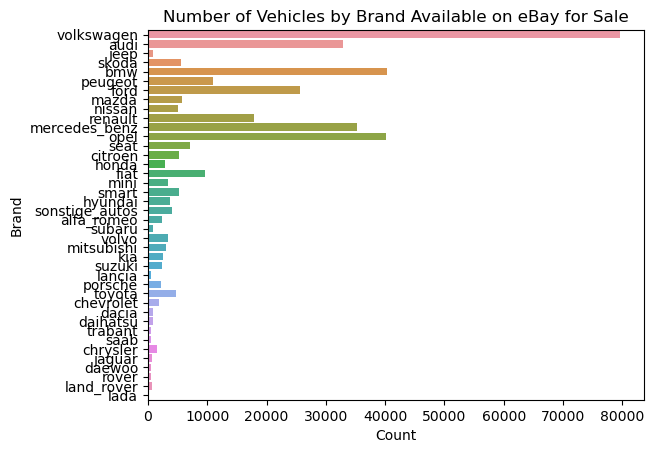

In [18]:
sns.countplot(y=data["brand"])
plt.ylabel('Brand')
plt.xlabel('Count')
plt.title('Number of Vehicles by Brand Available on eBay for Sale')
#plt.xticks(rotation=45)
plt.show()

In [20]:
# 2) What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis
avg_price=data.groupby(['vehicleType', 'gearbox'])['price'].mean()

In [21]:
avg_price

vehicleType  gearbox  
andere       automatik      7366.861496
             manuell      825539.352000
bus          automatik     10599.265713
             manuell        6321.168265
cabrio       automatik     16254.374208
             manuell       14897.823880
coupe        automatik     35500.199567
             manuell       12400.255031
kleinwagen   automatik      3889.552200
             manuell        4606.752785
kombi        automatik      8910.045892
             manuell        7464.627711
limousine    automatik     19004.102243
             manuell        8505.151711
suv          automatik     16764.091774
             manuell       10040.553599
Name: price, dtype: float64

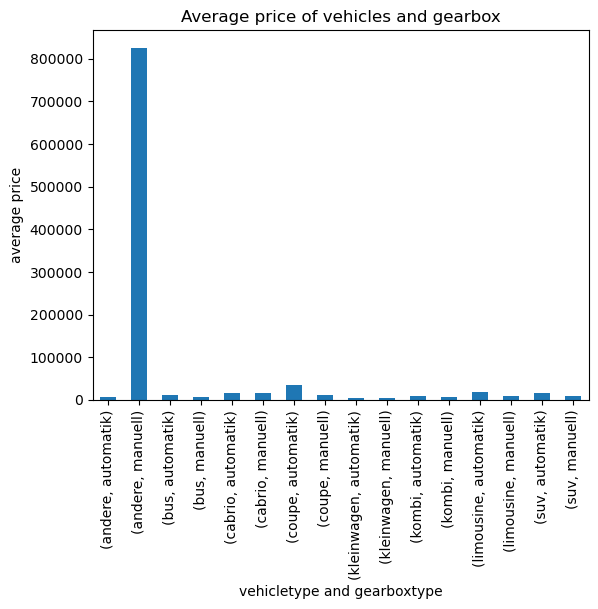

In [22]:
avg_price=data.groupby(['vehicleType', 'gearbox'])['price'].mean()
avg_price.plot(kind="bar")
plt.xlabel("vehicletype and gearboxtype")
plt.ylabel("average price")
plt.title("Average price of vehicles and gearbox")
plt.show()

In [15]:
#  3) What is the marginal probability of private seller
total_count = len(data)
private_seller_count = (data['seller'] == 'private').sum()
marginal_probability = private_seller_count / total_count

print(f"Marginal Probability of Private Seller: {marginal_probability:.2%}")

Marginal Probability of Private Seller: 0.00%


In [23]:
pd.crosstab(index=data["seller"]=="privat",columns=data["seller"]=="gewerblich",rownames=["privat"],colnames=["gewerblich"],normalize="all",margins=True)

gewerblich,False,True,All
privat,,,
False,0.000000,0.000008,0.000008
True,0.999992,0.000000,0.999992
All,0.999992,0.000008,1.000000
